In [1]:
import geopandas as gpd
import geodatasets

gdf = gpd.read_file(geodatasets.get_path("naturalearth_land"))
gdf

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,Land,0,0.0,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,Land,0,0.0,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."


In [2]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
world_gdf = gdf
world_gdf = world_gdf.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
world_gdf.crs



<Projected CRS: +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +un ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
world_gdf.columns

Index(['featurecla', 'scalerank', 'min_zoom', 'geometry'], dtype='object')

## Case Study

In [6]:
import contextily as ctx
import geopandas as gpd

deaths_df = gpd.read_file("SnowGIS/Cholera_Deaths.shp")
pumps_df = gpd.read_file("SnowGIS/Pumps.shp")

In [7]:
deaths_df.head()

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.38 181014.259)
4,0,4,POINT (529320.675 181007.872)


In [8]:
deaths_df.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [10]:
pumps_df.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
pumps_df   #pumps_df holds the positions of the water pumps near Broad Street.

,Id,geometry
0,0,POINT (529396.539 181025.063)
1,0,POINT (529192.538 181079.391)
2,0,POINT (529183.74 181193.735)
3,0,POINT (529748.911 180924.207)
4,0,POINT (529613.205 180896.804)
5,0,POINT (529453.586 180826.353)
6,0,POINT (529593.727 180660.455)
7,0,POINT (529296.104 180794.849)


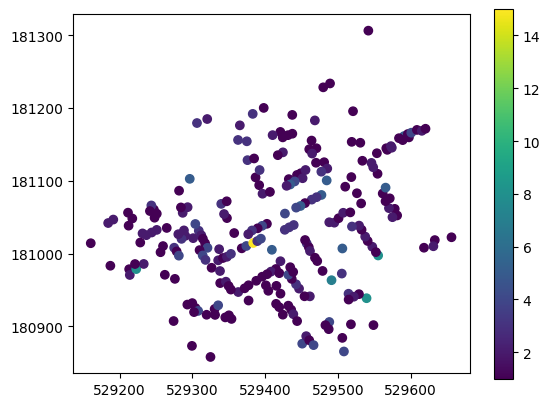

In [12]:
ax = deaths_df.plot(column='Count',legend=True)

<Axes: >

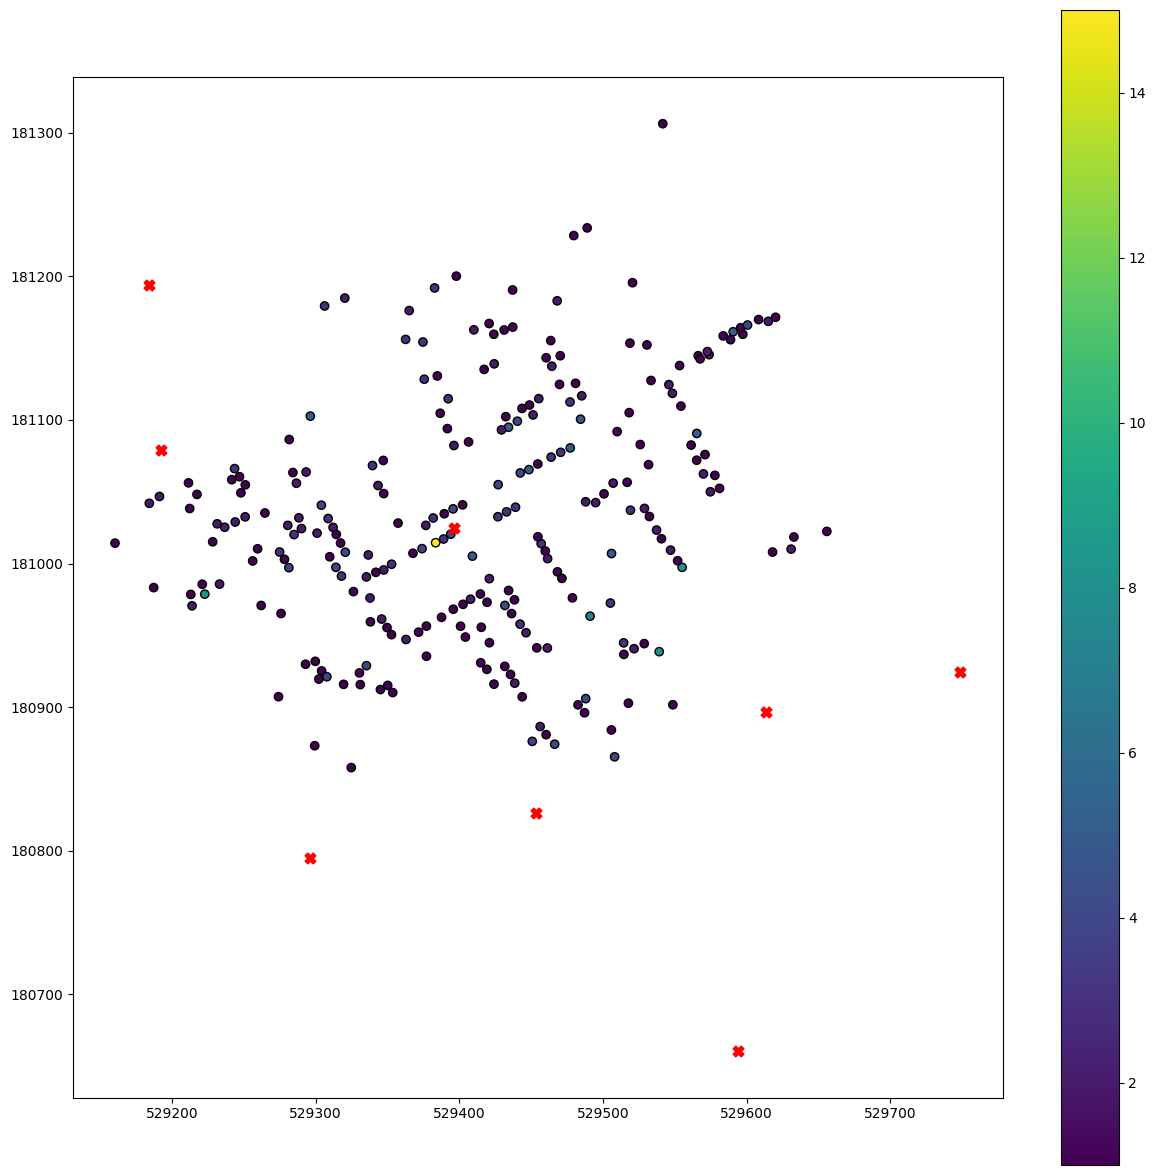

In [14]:
ax = deaths_df.plot(column='Count',legend = True,edgecolor='k',figsize=(15, 15),)
pumps_df.plot(ax =ax , marker = 'X',color = 'red',markersize=60)

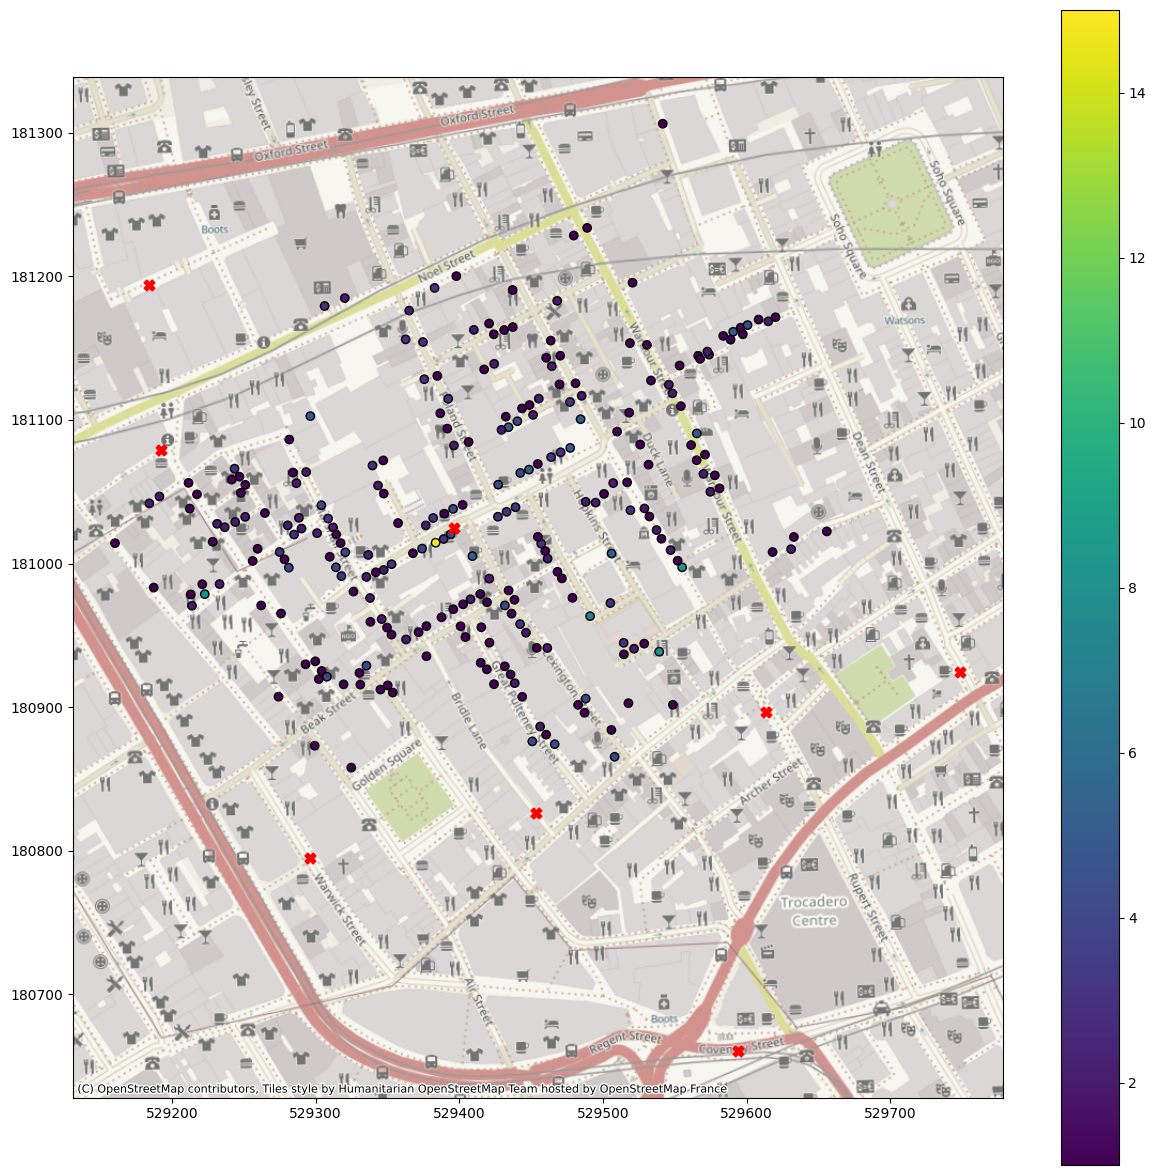

In [16]:
ax = deaths_df.plot(column='Count',legend = True,edgecolor='k',figsize=(15, 15),)
pumps_df.plot(ax =ax , marker = 'X',color = 'red',markersize=60)
ctx.add_basemap(
    ax,
    crs = deaths_df.crs.to_string()
)

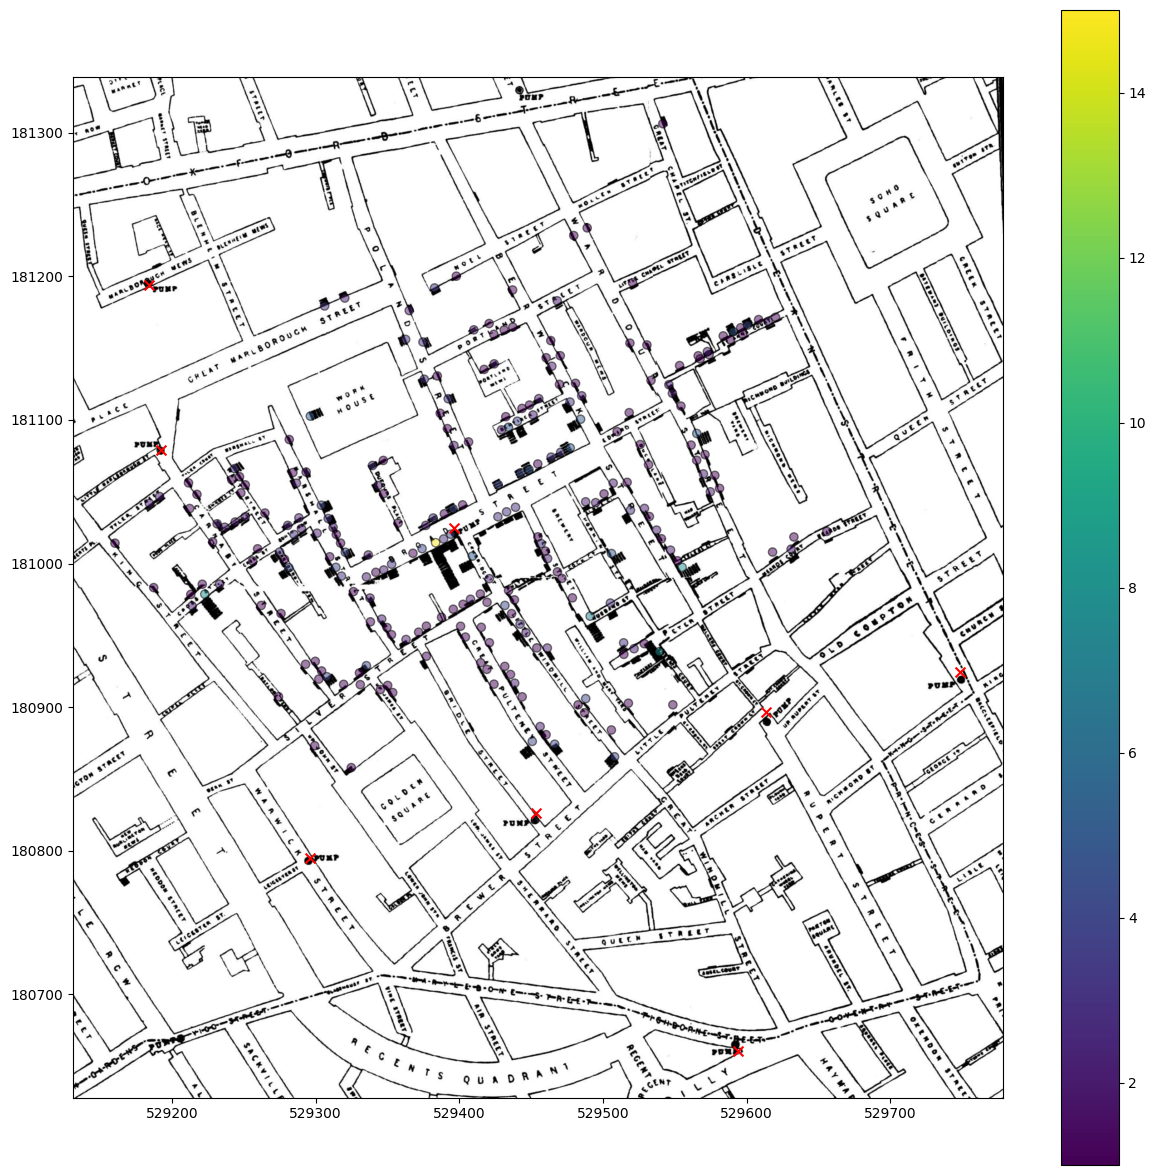

In [20]:
ax = deaths_df.plot(column='Count', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50);

ctx.add_basemap(
    ax,
    crs = deaths_df.crs,
    source = 'SnowGIS/SnowMap.tif'
)

## GeoPandas tut

In [30]:
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

gdf = gpd.read_file(url)
gdf

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.13629 41.42363, 2.1364 41.42358, 2..."
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.15949 41.44977, 2.15942 41.4496, 2..."
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [34]:
gdf.to_crs(epsg=2062,inplace=True)

In [35]:
gdf.crs

<Projected CRS: EPSG:2062>
Name: Madrid 1870 (Madrid) / Spain LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Spain - mainland onshore.
- bounds: (-9.37, 35.95, 3.39, 43.82)
Coordinate Operation:
- name: Spain
- method: Lambert Conic Conformal (1SP)
Datum: Madrid 1870 (Madrid)
- Ellipsoid: Struve 1860
- Prime Meridian: Madrid

In [36]:
gdf['area'] = gdf.area/1000000
gdf['centroid'] = gdf.centroid

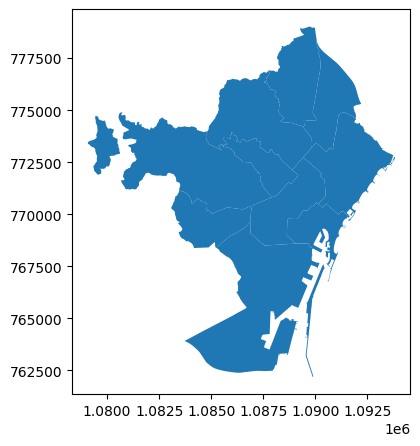

In [37]:
ax = gdf.plot(figsize=(10,5))

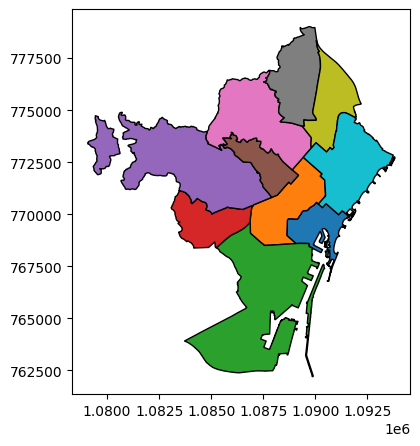

In [41]:
ax = gdf.plot(column = 'DISTRICTE',figsize=(10,5),edgecolor='black')

In [39]:
gdf.columns

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry', 'area', 'centroid'],
      dtype='object')

In [47]:
# locating a point 

from shapely.geometry import Point

sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam = gpd.GeoSeries(sagrada_fam,crs = 4326)
sagrada_fam = sagrada_fam.to_crs(epsg=2062)
gdf['distance_from_sagrada_fam'] = [float(sagrada_fam.distance(cent))/1000 for cent in gdf.centroid]

/tmp/ipykernel_6935/4015238541.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  gdf['distance_from_sagrada_fam'] = [float(sagrada_fam.distance(cent))/1000 for cent in gdf.centroid]


In [48]:
gdf.distance_from_sagrada_fam

0    2.555267
1    1.573619
2    6.479118
3    5.044077
4    5.754595
5    1.989790
6    3.458303
7    4.733017
8    3.824280
9    2.271345
Name: distance_from_sagrada_fam, dtype: float64

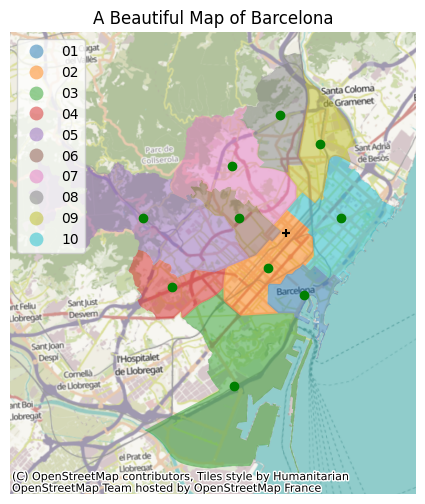

In [52]:
import contextily as ctx
import matplotlib.pyplot as plt

import contextily
ax= gdf.plot(column='DISTRICTE', figsize=(12,6), alpha=0.5, legend=True)
gdf["centroid"].plot(ax=ax, color="green")
sagrada_fam.plot(ax=ax,color='black', marker='+')
contextily.add_basemap(ax, crs=gdf.crs.to_string())
plt.title('A Beautiful Map of Barcelona')
plt.axis('off')
plt.show()